In [2]:
import glob
import subprocess
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

original_dir = "/Users/hunterholland/Documents/Research/Laidlaw/Original Data"
data_dir = "/Users/hunterholland/Documents/Research/Laidlaw/Modified Data"

## Original Files

In [3]:
spitzer_sample_org = None
chandra_sample_org = f"{original_dir}/L1521E/Chandra/primary/acisf07419N002_evt2.fits"
xmm_sample_org = f"{original_dir}/L1251BE/XMM/PPS/P0201540101PNS003PIEVLI0000.FTZ"
rosat_sample_org = None
swift_sample_org = None

## Sample Files

In [4]:
spitzer_sample = None
chandra_sample = f"{data_dir}/L1521E/Chandra/primary/acisf07419N002_evt2.fits"
xmm_sample = f"{data_dir}/L1251BE/XMM/PPS/P0201540101PNS003PIEVLI0000.FTZ"
rosat_sample = None
swift_sample = None

# Chandra
## Event File Info

In [5]:
hdu_list = fits.open(chandra_sample)
hdu_list.info()

Filename: /Users/hunterholland/Documents/Research/Laidlaw/Modified Data/L1521E/Chandra/primary/acisf07419N002_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  EVENTS        1 BinTableHDU    897   22117R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           5 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  7  GTI           8 BinTableHDU     28   1R x 2C   [1D, 1D]   


## Event Column Names

In [6]:
evt_table = hdu_list[1]
evt_table.columns
# energy column name = "energy"

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

In [7]:
evt_data = evt_table.data
energy = evt_table.data["energy"]

## Messing Around with Data Analysis
### Making Figures

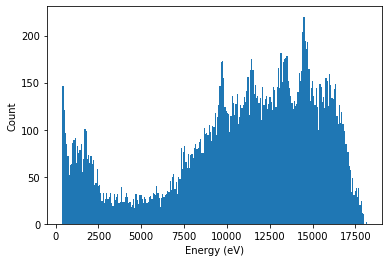

In [8]:
evt_data = fits.getdata(chandra_sample)
energy = evt_data["energy"]
min_thresh = energy>=400
max_thresh = energy<25000
e_band = energy[min_thresh & max_thresh]
plt.hist(e_band, bins=250)
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

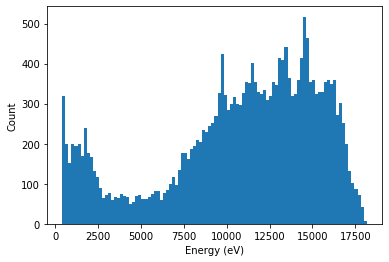

In [10]:
energy_hist = plt.hist(energy, bins=100)
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

### Filtering Files

In [11]:
with fits.open(chandra_sample, mode='update') as hdu_list:
    evt_table = hdu_list[1]
    energy_mask = evt_table.data["energy"] > 400
    # coord_mask = None
    evt_table.data = evt_table.data[energy_mask]
    # evt_table.data = evt_table.data[coord_mask]

# XMM-Newton
## Event File Info

In [9]:
hdu_list = fits.open(xmm_sample)
hdu_list.info()

Filename: /Users/hunterholland/Documents/Research/Laidlaw/Modified Data/L1251BE/XMM/PPS/P0201540101PNS003PIEVLI0000.FTZ
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     383   ()      
  1  EVENTS        1 BinTableHDU    243   700648R x 15C   [D, I, I, I, I, J, J, I, I, J, B, I, B, B, D]   
  2  OFFSETS       1 BinTableHDU    101   14R x 3C   [I, I, B]   
  3  BADPIX01      1 BinTableHDU     97   72R x 5C   [I, I, I, I, I]   
  4  EXPOSU01      1 BinTableHDU    321   423454R x 2C   [D, E]   
  5  DLIMAP01      1 BinTableHDU    286   200R x 2C   [J, J]   
  6  HKAUX01       1 BinTableHDU    285   21150R x 2C   [D, E]   
  7  BADPIX02      1 BinTableHDU     97   68R x 5C   [I, I, I, I, I]   
  8  EXPOSU02      1 BinTableHDU    321   423454R x 2C   [D, E]   
  9  DLIMAP02      1 BinTableHDU    286   200R x 2C   [J, J]   
 10  HKAUX02       1 BinTableHDU    285   21150R x 2C   [D, E]   
 11  BADPIX03      1 BinTableHDU     97   65R x 5C   [I,

## Event Column Names

In [10]:
evt_table = hdu_list[1]
evt_table.columns
# energy column name = "PI"

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RAWX'; format = 'I'; unit = 'pixel'
    name = 'RAWY'; format = 'I'; unit = 'pixel'
    name = 'DETX'; format = 'I'; unit = '0.05 arcsec'; coord_ref_point = 0; coord_inc = 1.38888888888889e-05
    name = 'DETY'; format = 'I'; unit = '0.05 arcsec'; coord_ref_point = 0; coord_inc = 1.38888888888889e-05
    name = 'X'; format = 'J'; unit = '0.05 arcsec'; null = -99999999; coord_type = 'RA---TAN'; coord_unit = 'deg'; coord_ref_point = 25921; coord_ref_value = 339.566583333333; coord_inc = -1.38888888888889e-05
    name = 'Y'; format = 'J'; unit = '0.05 arcsec'; null = -99999999; coord_type = 'DEC--TAN'; coord_unit = 'deg'; coord_ref_point = 25921; coord_ref_value = 75.2211666666667; coord_inc = 1.38888888888889e-05
    name = 'PHA'; format = 'I'; unit = 'channel'
    name = 'PI'; format = 'I'; unit = 'eV'; null = -32768
    name = 'FLAG'; format = 'J'
    name = 'PATTERN'; format = 'B'; null = 13
    name = 'PAT_ID'; format =

In [ ]:
evt_data = evt_table.data
energy = evt_data["PI"] 

## Messing Around with Data Analysis
### Making Figures

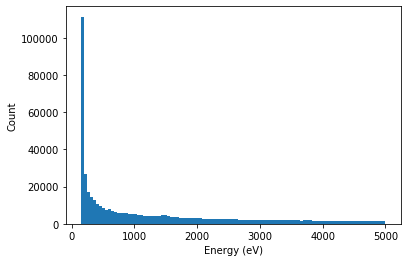

In [21]:
evt_data = fits.getdata(xmm_sample)
energy = evt_data["PI"]
min_thresh = energy>=0
max_thresh = energy<5000
e_band = energy[min_thresh & max_thresh]
plt.hist(e_band, bins='auto')
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

### Filtering Files in Place

In [12]:
with fits.open(xmm_sample, mode='update') as hdu_list:
    evt_table = hdu_list[1]
    energy_mask = evt_table.data["PI"] > 400
    # coord_mask = None
    evt_table.data = evt_table.data[energy_mask]
    # evt_table.data = evt_table.data[coord_mask]
    hdu_list.flush()